In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
stock = 'INFY.NS'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,326.250000,328.750000,324.412506,326.575012,246.820877,4069264
2010-01-05,327.500000,328.837494,325.012512,327.668762,247.647507,6895528
2010-01-06,335.375000,335.375000,321.887512,322.887512,244.033890,6817288
2010-01-07,323.325012,323.325012,314.774994,315.631256,238.549744,10892600
2010-01-08,314.875000,315.412506,307.250000,308.024994,232.801025,12649312


In [22]:
price = data['Close']
price

Date
2010-01-04     326.575012
2010-01-05     327.668762
2010-01-06     322.887512
2010-01-07     315.631256
2010-01-08     308.024994
                 ...     
2023-05-08    1265.599976
2023-05-09    1270.699951
2023-05-10    1263.250000
2023-05-11    1256.099976
2023-05-12    1245.199951
Name: Close, Length: 3297, dtype: float64

<AxesSubplot: xlabel='Date'>

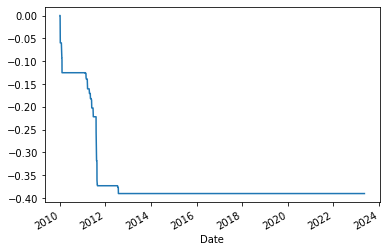

In [23]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [24]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -38.99668015870105 %


In [25]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00334915, -0.01459172, ..., -0.00586287,
       -0.00566002, -0.00867767])

In [26]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00334915, 0.98870857, ..., 3.86817715, 3.84628318,
       3.81290639])

In [27]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 381.2906390959509%


In [33]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.196093
2012-12-31   -0.162213
2013-12-31    0.503278
2014-12-31    0.131812
2015-12-31    0.120783
2016-12-31   -0.085761
2017-12-31    0.031120
2018-12-31    0.264719
2019-12-31    0.109568
2020-12-31    0.717568
2021-12-31    0.503225
2022-12-31   -0.201059
2023-12-31   -0.174380
Freq: A-DEC, Name: Close, dtype: float64

In [34]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.051081
2010-03-31    0.005381
2010-04-30    0.046713
2010-05-31   -0.029272
                ...   
2023-01-31    0.016941
2023-02-28   -0.030122
2023-03-31   -0.040066
2023-04-30   -0.122693
2023-05-31   -0.006027
Freq: M, Name: Close, Length: 161, dtype: float64

In [35]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 12.019734421698184%


In [36]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 6.573396383616384


In [37]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.029272
2010-07-31   -0.000932
2010-08-31   -0.026736
2010-10-31   -0.025832
2011-01-31   -0.094416
                ...   
2022-12-31   -0.077525
2023-02-28   -0.030122
2023-03-31   -0.040066
2023-04-30   -0.122693
2023-05-31   -0.006027
Name: Close, Length: 71, dtype: float64

In [39]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 10.533623739329522
